# 🎶 Atelier de calibration de modèle - Tempo & Musique

Bienvenue ! 👋  
Aujourd’hui, tu vas découvrir comment on peut utiliser des **modèles mathématiques** pour analyser des données... musicales !  
Et surtout, tu vas apprendre à **ajuster** un modèle pour qu’il colle le mieux possible à la réalité 🎯

---

## 🔍 Contexte

Dans cet atelier, tu vas manipuler des données simulées représentant le **tempo moyen des chansons** de 1980 à 2020.  
Ton objectif : ajuster un modèle linéaire `y = a * x + b` pour qu’il prévoie bien ces tempos au fil du temps.


## 📦 Étape 1 : Chargement des outils

On commence par importer les bibliothèques Python dont on aura besoin :
- `numpy` pour les calculs numériques
- `matplotlib` pour les graphiques
- `pandas` pour manipuler les données facilement

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 🎼 Étape 2 : Génération des données

Ici, on simule un ensemble de données représentant l'évolution du **tempo moyen (en BPM)** des chansons entre 1980 et 2020.

Le vrai modèle (caché 👀) est de la forme `y = 0.3 * x + 90`, mais on y ajoute un peu de **bruit aléatoire** pour rendre les données plus réalistes.

In [2]:
np.random.seed(42)

annees = np.arange(1980, 2021)
true_a = 0.5
true_b = 80
tempos = true_a * (annees-1980) + true_b + np.random.normal(0, 3, size=len(annees))
df = pd.DataFrame({'Année': annees, 'Tempo (BPM)': tempos})
df.head()



,Année,Tempo (BPM)
0,1980,81.490142
1,1981,80.085207
2,1982,82.943066
3,1983,86.069090
4,1984,81.297540


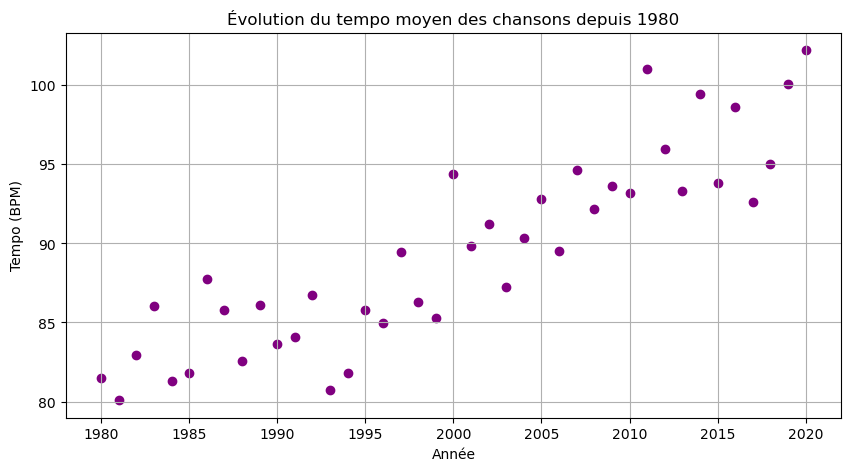

In [3]:
# Affichage des données
plt.figure(figsize=(10, 5))
plt.scatter(df['Année'], df['Tempo (BPM)'], color='purple')
plt.title("Évolution du tempo moyen des chansons depuis 1980")
plt.xlabel("Année")
plt.ylabel("Tempo (BPM)")
plt.grid(True)
plt.show()

## 🤖 Étape 3 : Essai d’un premier modèle

On essaie un modèle avec des paramètres `a` et `b` choisis un peu au hasard.

Est-ce que la courbe colle bien aux points ? Pas vraiment 😅  
➡️ Il va falloir **calibrer** notre modèle pour l’améliorer !

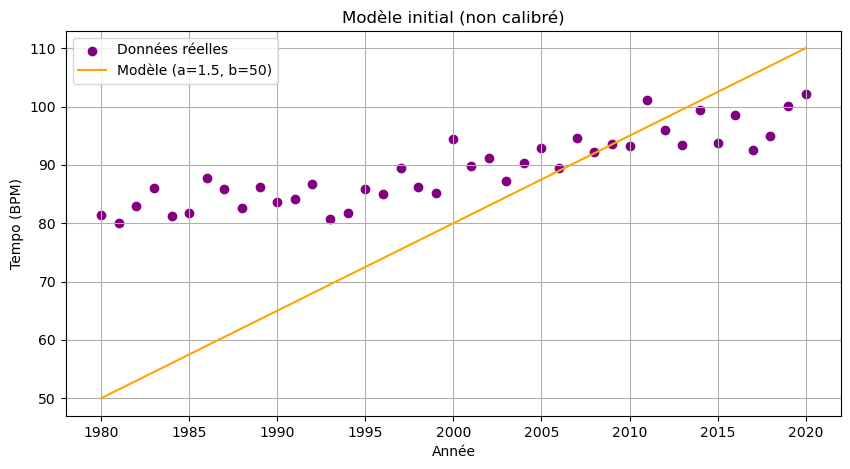

In [4]:
def modele_lineaire(x, a, b):
    return a * (x-1980) + b

a_test, b_test = 1.5, 50
df['Tempo préd (modèle test)'] = modele_lineaire(df['Année'], a_test, b_test)

plt.figure(figsize=(10, 5))
plt.scatter(df['Année'], df['Tempo (BPM)'], label="Données réelles", color='purple')
plt.plot(df['Année'], df['Tempo préd (modèle test)'], label="Modèle (a=1.5, b=50)", color='orange')
plt.title("Modèle initial (non calibré)")
plt.xlabel("Année")
plt.ylabel("Tempo (BPM)")
plt.legend()
plt.grid(True)
plt.show()

## 🛠️ Étape 4 : Calibration manuelle

À toi de jouer !  
Modifie les valeurs de `a_user` et `b_user` pour que la courbe colle au mieux aux données réelles.

Essaie plusieurs combinaisons pour minimiser l’écart entre les points et ta courbe.

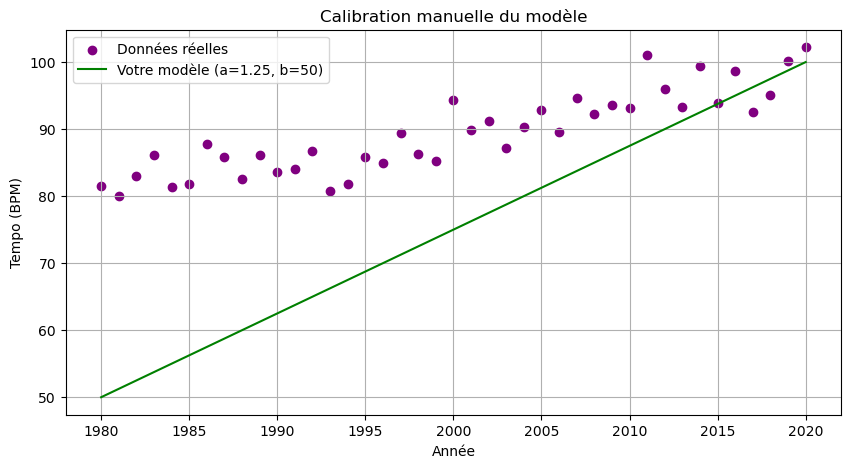

In [5]:
# PARAMETRES A CHANGER
a_user = 1.25
b_user = 50

# prediction du modèle avec les paramètres
df['Tempo préd (vous)'] = modele_lineaire(df['Année'], a_user, b_user)

# Figure
plt.figure(figsize=(10, 5))
plt.scatter(df['Année'], df['Tempo (BPM)'], label="Données réelles", color='purple')
plt.plot(df['Année'], df['Tempo préd (vous)'], label=f"Votre modèle (a={a_user}, b={b_user})", color='green')
plt.title("Calibration manuelle du modèle")
plt.xlabel("Année")
plt.ylabel("Tempo (BPM)")
plt.legend()
plt.grid(True)
plt.show()

## 📏 Étape 5 : Mesure de l’erreur

On mesure ici l’**écart moyen** entre les valeurs prédites par ton modèle et les vraies données.

Plus l’erreur est **petite**, meilleur est ton modèle !


In [6]:
# calcul de l'erreur du modèle
def erreur_moyenne_reelle_vs_modele(y_reel, y_modele):
    return np.mean(np.abs(y_reel - y_modele))

erreur = erreur_moyenne_reelle_vs_modele(df['Tempo (BPM)'], df['Tempo préd (vous)'])
print(f"Erreur moyenne de votre modèle : {erreur:.2f} BPM")

Erreur moyenne de votre modèle : 14.71 BPM


## Challenge Cas des données bruitées
### 🎤 Pourquoi il y a du bruit dans les données ?

Dans la vraie vie, les données ne sont jamais parfaites.

Voici quelques raisons :
- Les mesures peuvent contenir des **erreurs** (instruments imprécis, humains, etc.)
- Il existe des **facteurs non pris en compte** par le modèle (ex: genre musical, producteur, humeur du moment…)
- Le monde est **complexe et variable** : deux chansons d’une même année ne sont jamais identiques !

➡️ On appelle cela du **bruit** : c’est une variation aléatoire qui complique le travail du modèle... mais le rend aussi plus réaliste !

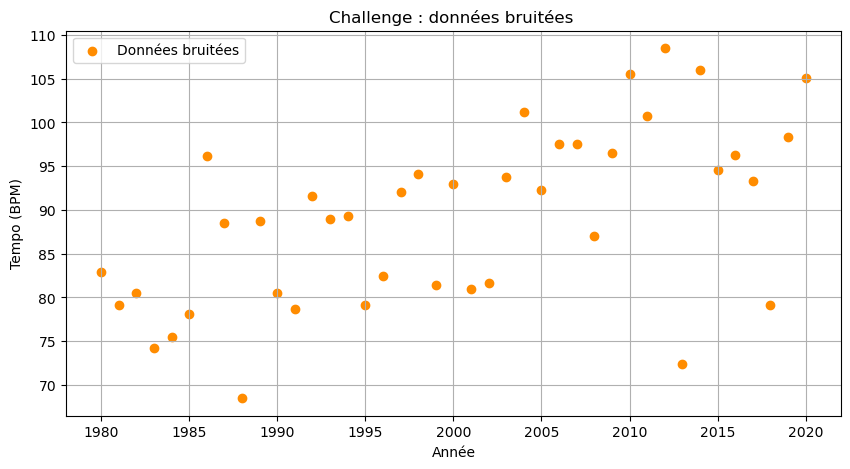

In [7]:
# GENERATION DES DONNEES BRUITEES
df_bruite = df.copy()
df_bruite['Tempo bruité'] = df_bruite['Tempo (BPM)'] + np.random.normal(0, 8, size=len(df))

plt.figure(figsize=(10, 5))
plt.scatter(df_bruite['Année'], df_bruite['Tempo bruité'], label="Données bruitées", color='darkorange')
plt.title("Challenge : données bruitées ")
plt.xlabel("Année")
plt.ylabel("Tempo (BPM)")
plt.legend()
plt.grid(True)
plt.show()

### Calibration manuelle des données bruitées

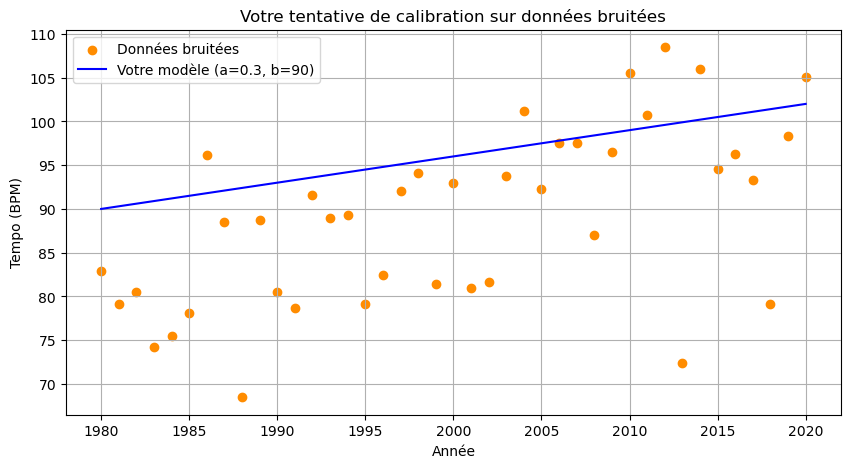

Erreur moyenne sur données bruitées : 8.60 BPM


In [8]:
a_bruite = 0.3
b_bruite = 90

df_bruite['Tempo préd'] = modele_lineaire(df_bruite['Année'], a_bruite, b_bruite)

plt.figure(figsize=(10, 5))
plt.scatter(df_bruite['Année'], df_bruite['Tempo bruité'], label="Données bruitées", color='darkorange')
plt.plot(df_bruite['Année'], df_bruite['Tempo préd'], label=f"Votre modèle (a={a_bruite}, b={b_bruite})", color='blue')
plt.title("Votre tentative de calibration sur données bruitées")
plt.xlabel("Année")
plt.ylabel("Tempo (BPM)")
plt.legend()
plt.grid(True)
plt.show()

erreur_bruite = erreur_moyenne_reelle_vs_modele(df_bruite['Tempo bruité'], df_bruite['Tempo préd'])
print(f"Erreur moyenne sur données bruitées : {erreur_bruite:.2f} BPM")

## ⚙️ Étape 6 : Calibration automatique (optionnelle)

Pour aller plus loin : on utilise un **algorithme très simple** (descente de gradient) pour que l’ordinateur trouve automatiquement les meilleurs paramètres `a` et `b`.

Tu vas voir que les résultats sont souvent bien meilleurs !


Aperçu des données :
   Année  Tempo (BPM)
0   1980    81.490142
1   1981    80.085207
2   1982    82.943066
3   1983    86.069090
4   1984    81.297540

Statistiques descriptives :
count     41.000000
mean      89.414121
std        6.108879
min       80.085207
25%       84.961507
50%       89.442742
75%       93.624919
max      102.215400
Name: Tempo (BPM), dtype: float64
Epoch 0: MSE = 36.4082, a = 0.1269, b = 89.4141
Epoch 100: MSE = 26.8781, a = 0.1343, b = 88.9563
Epoch 200: MSE = 24.9871, a = 0.1504, b = 88.5220
Epoch 300: MSE = 23.2821, a = 0.1657, b = 88.1096
Epoch 400: MSE = 21.7449, a = 0.1802, b = 87.7180
Epoch 500: MSE = 20.3590, a = 0.1939, b = 87.3461
Epoch 600: MSE = 19.1095, a = 0.2070, b = 86.9930
Epoch 700: MSE = 17.9829, a = 0.2195, b = 86.6578
Epoch 800: MSE = 16.9671, a = 0.2313, b = 86.3395
Epoch 900: MSE = 16.0514, a = 0.2425, b = 86.0372
Epoch 1000: MSE = 15.2257, a = 0.2531, b = 85.7502
Epoch 1100: MSE = 14.4813, a = 0.2632, b = 85.4777
Epoch 1200: MSE = 13.810

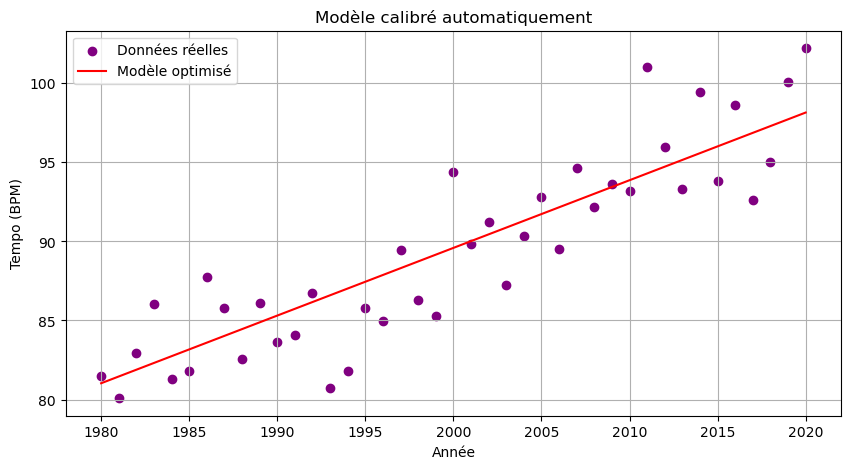

In [9]:
print("Aperçu des données :")
print(df[["Année", "Tempo (BPM)"]].head())
print("\nStatistiques descriptives :")
print(df["Tempo (BPM)"].describe())

x_raw = df['Année'].values.astype(np.float64)
x = x_raw - 1980
#x = x_raw #- 1980  # centrage autour de 0
y = df['Tempo (BPM)'].values

# initialisation des paramètres
a, b = 0.0, np.mean(y)  # b initialisé à la moyenne pour plus de stabilité
learning_rate = 1e-3
epochs = 5000

# Descente de gradient
for i in range(epochs):
    y_pred = a * x + b
    error = y - y_pred

    grad_a = -2 * np.mean(error * x)
    grad_b = -2 * np.mean(error)

    a -= learning_rate * grad_a
    b -= learning_rate * grad_b

    if i % 100 == 0:
        mse = np.mean(error ** 2)
        print(f"Epoch {i}: MSE = {mse:.4f}, a = {a:.4f}, b = {b:.4f}")


# Affichage final
print(f"\n✅ Modèle final : a = {a:.4f}, b = {b:.4f}")

# Affichage
plt.figure(figsize=(10, 5))
plt.scatter(x_raw, y, label="Données réelles", color='purple')
plt.plot(x_raw, a * (x_raw - 1980) + b, label="Modèle optimisé", color='red')
plt.title("Modèle calibré automatiquement")
plt.xlabel("Année")
plt.ylabel("Tempo (BPM)")
plt.legend()
plt.grid(True)
plt.show()

### 🔬 Ce que vous venez de faire, je le fais aussi dans ma recherche...

Vous avez testé et ajusté un **modèle simple** pour qu’il colle aux **données réelles**.

Moi aussi je fais ça ! Mais avec :
- des modèles plus complexes (non linéaires),
- des incertitudes à gérer,
- et des algorithmes puissants pour optimiser les paramètres.

👉 Vous venez de découvrir ce qu’est **la calibration** d’un modèle : c’est une étape clé en science des données, en climatologie, en santé, en ingénierie… et en musique aussi ! 